# Module 5 Unit 3
## Improve a neural network with regularisation

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will not be graded, but you should submit it when you submit your assignment, so that the Tutor Team can see how you arrived at your answers.

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
# Import data
df = pd.read_csv('auto-mpg.csv', delimiter = ",")

# Drop missing entries
df = df.replace("?", np.nan)
df = df.dropna()

In [3]:
# Explore the size of the data set
df.shape 

(392, 9)

In [4]:
# Explore type of data and feature names
df.head() # or df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# Split data into features (X) and response (y)
# Predict mpg vs other variables (excluding car name)
X = df.iloc[:, 1:8] 
y = df.iloc[:, 0]

In [6]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [7]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [8]:
# Put the response y into an array
y = np.ravel(y)

In [9]:
# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# Scale data
scaler = StandardScaler()  

# Remember to fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

### Before regularisation

Use the `solver=lbfgs`, `activation="tanh"` and `hidden_layer_sizes=(5)` to train the network.

In [16]:
# Fit and check MSE before regularisation
# YOUR CODE HERE
reg = MLPRegressor(max_iter=10000, activation="tanh", solver="lbfgs", hidden_layer_sizes=(5), random_state=1)
reg.fit(X_train, y_train)

# Predict
# YOUR CODE HERE
y_pred = reg.predict(X_test)

# MSE before regularisation
# YOUR CODE HERE
mean_squared_error(y_pred, y_test)

9.116897986176085

### Regularisation
Train the model using the list of potential alpha values in `reg_par`, and determine the validation score as you learnt in Unit 2.

In [17]:
# Find regularisation parameter
reg_par = [np.e**n for n in np.arange(-3,6,1)] 

# Optimise neural network with regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")  
# YOUR CODE HERE
for param in reg_par:
    reg = MLPRegressor(max_iter=10000, activation="tanh", 
                       solver="lbfgs", alpha = param, hidden_layer_sizes=(5), random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train,
                           cv=3, scoring="neg_mean_squared_error")
    validation_scores[param] = -score.mean()
    print("%0.5f | %0.6f" % (param, -score.mean()))


 alpha  |  Sq.Error
0.04979 | 11.000804
0.13534 | 11.129626
0.36788 | 8.721438
1.00000 | 8.282562
2.71828 | 8.764460
7.38906 | 7.873945
20.08554 | 8.021878
54.59815 | 10.917239
148.41316 | 16.426258


Text(0, 0.5, 'Mean Sq Error')

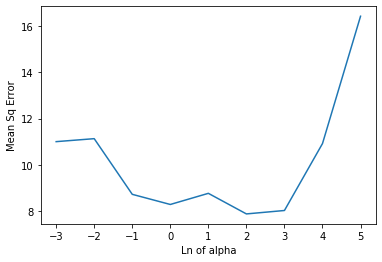

In [18]:
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")


Print the lowest cross-validation error and the value to use for the `alpha` parameter in the following cell.

In [19]:
# Check errors
# YOUR CODE HERE
print("The lowest cross validation error is %f" % min(validation_scores.values()))
print("This corresponds to regularisation parameter e**%s" %
     ([np.log(name) for name, score in validation_scores.items()
                  if score==min(validation_scores.values())][0]))

The lowest cross validation error is 7.873945
This corresponds to regularisation parameter e**2.0


 ### After regularisation

In [21]:
# Fit data with the best parameter
# YOUR CODE HERE
reg = MLPRegressor(max_iter=10000, activation="tanh", 
                       solver="lbfgs", alpha = np.e**(1.5), hidden_layer_sizes=(5), random_state=1)
reg.fit(X_train, y_train)

# Predict
# YOUR CODE HERE
y_pred = reg.predict(X_test)

# MSE final
# YOUR CODE HERE
mean_squared_error(y_pred, y_test)

8.169134688898966

Did you notice a decrease in error?

Use a response function to interpret the fitted model by observing mpg vs weight. Remember to fix other variables to the median for that column. 

### Steps for setting up a response function
1. Find the minimum and maximum weight values
2. Set up a list of moving resultants
3. Predict using the above two sets of values
4. Plot miles per gallon against car weight

### Response function after regularisation

In [22]:
# Draw a response function

# Prepare data for graph
# Copy dataframe so as not to change original, and obtain medians
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

# View X_design_vec, which should contain the median of each respective column
X_design_vec.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4.0,151.0,93.5,2803.5,15.5,76.0,1.0


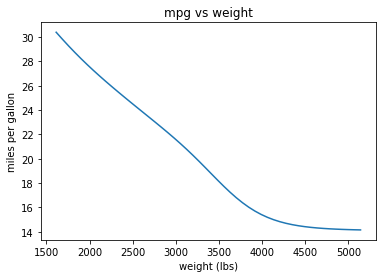

In [23]:
# Obtain the min and max of the weight variable and set up a sequence
# YOUR CODE HERE
min_res = min(X.loc[:, "weight"])
max_res = max(X.loc[:, "weight"])
seq = np.linspace(start=min_res, stop=max_res, num=50)

# Set up a list of moving resultants
to_predict = []
# YOUR CODE HERE
for result in seq:
    X_design_vec.loc[0, "weight"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
# YOUR CODE HERE
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("weight (lbs)")
plt.ylabel("miles per gallon")
plt.title("mpg vs weight")
plt.show()


Continue to the activity submission to answer questions about this notebook.